In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

%matplotlib inline

/Users/zytec/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 探索数据集

In [29]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [33]:
df_train.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_test.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_test.values.max()

255

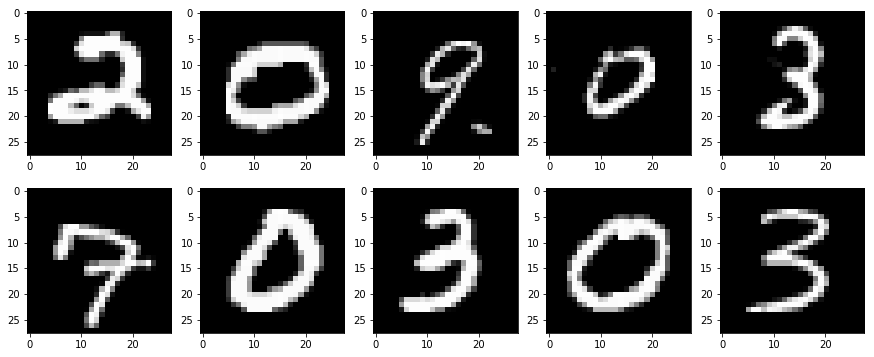

In [36]:
example_imgs = df_test.iloc[:10].values.reshape(-1, 28, 28)

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['image.cmap'] = 'gray'
for index, img in enumerate(example_imgs):
    plt.subplot(2, 5, index+1)
    plt.imshow(img)

## 划分数据集

In [40]:
X_total = df_train.iloc[:, 1:].values.reshape(-1, 28, 28)
Y_total = df_train.iloc[:, 0].values.reshape(-1, 1)
X_test = df_test.values.reshape(-1, 28, 28)

X_total.shape, Y_total.shape, X_test.shape

((42000, 28, 28), (42000, 1), (28000, 28, 28))

In [41]:
shuffle_indexs = np.random.permutation(X_total.shape[0])
X_total_shuffle = X_total[shuffle_indexs]
Y_total_shuffle = Y_total[shuffle_indexs]

In [43]:
dev_size = 6000

X_dev = X_total_shuffle[:dev_size]
Y_dev = Y_total_shuffle[:dev_size]
X_train = X_total_shuffle[dev_size:]
Y_train = Y_total_shuffle[dev_size:]

## 数据生成器

#### 数据增强

In [79]:
def data_augmentation(X, Y=None):
    if Y is None:
        return X
    else:
        return X, Y

#### 数据归一化

In [80]:
def normalize_data(X, Y=None):
    if Y is None:
        return X / 255
    else:
        return X / 255, Y

In [81]:
def parser(X, Y=None):
    X, Y = data_augmentation(X, Y)
    X, Y = normalize_data(X, Y)
    
    if Y is None:
        return X
    else:
        return X, Y

#### mini batch 生成器

In [82]:
def batch_gen(X, Y, batch_size, repeat=1, num_parallels=4):
    m = X.shape[0]
    epochs = m // batch_size
    
    if m % batch_size:
        epochs += 1
    
    if Y is None:
        dataset = tf.data.Dataset.from_tensor_slices(X)
    else:
        dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(parser, num_parallels)
    dataset = dataset.batch(batch_size)
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.repeat(repeat)
    
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [90]:
gen = batch_gen(X_dev, None, batch_size=7, repeat=1)

TypeError: Tensor objects are not iterable when eager execution is not enabled. To iterate over this tensor use tf.map_fn.

In [89]:
with tf.Session() as sess:
    for i in range(10):
        X, Y = sess.run(gen)
        print(X.shape, Y.shape)

(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
(7, 28, 28) (7, 1)
